<a href="https://colab.research.google.com/github/loveneeshdhir/GDG-Intro-To-ML/blob/master/Keras_NNmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow
!pip install keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

Train images shape (60000, 28, 28)
Total traning images 60000
Test images shape (10000, 28, 28)
Total test images 10000


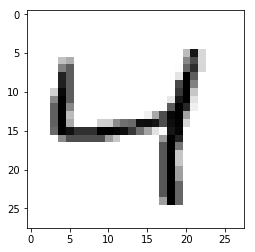

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'Train images shape {train_images.shape}')
print('Total traning images {0}'.format(len(train_labels)))
print(f'Test images shape {test_images.shape}')
print('Total test images {0}'.format(len(test_labels)))

plt.imshow(train_images[2], cmap=plt.cm.binary)
plt.show()


In [0]:
train_images = train_images.reshape((60000, 28 * 28)) # creating vectors of (28, 28) matrix
train_images = train_images.astype('float32')/255


train_labels = to_categorical(train_labels) # turning into one-hot encoded

test_images = test_images.reshape((10000, 28 * 28))# creating vectors of (28, 28) matrix
test_images = test_images.astype('float32')/255

test_labels = to_categorical(test_labels)# turning into one-hot encoded

In [0]:
net = models.Sequential()
net.add(layers.Dense(1024, activation='relu', input_shape=( 28 * 28, )))
net.add(layers.Dense(10, activation='softmax'))


In [0]:
net.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(net.summary())

net.fit(train_images, train_labels, epochs = 5, batch_size=64)

test_loss, test_acc = net.evaluate(test_images, test_labels)
print(f'Test Accuracy, {test_acc}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
60000/60000 [==============================] - 14s 231us/step - loss: 0.2036 - acc: 0.9400
Epoch 2/5
60000/60000 [==============================] - 14s 229us/step - loss: 0.0830 - acc: 0.9755
Epoch 3/5
60000/60000 [==============================] - 14s 228us/step - loss: 0.0553 - acc: 0.9832
Epoch 4/5
60000/60000 [==============================] - 14s 228us/step - loss: 0.0410 - acc: 0.9880
Epoch 5/5
10000/10000 [==============================] - 1s 79us/step
Test Accuracy, 0.9795


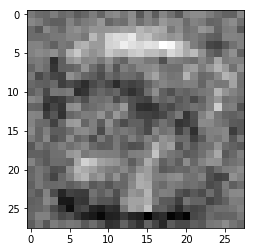

In [0]:
first_layer = net.layers[0].get_weights()[0]
plt.imshow(np.array(first_layer).reshape(784, 1024).T[5].reshape(28, 28) , cmap='binary')

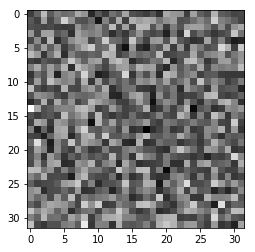

In [0]:
second_layer = net.layers[1].get_weights()[0]
plt.imshow(np.array(second_layer).reshape(1024, 10).T[0].reshape(32, 32) , cmap='binary')

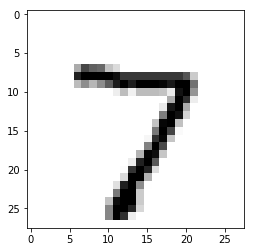

7

In [0]:
index = 0
plt.imshow(test_images[index].reshape(28,28), cmap=plt.cm.binary)
plt.show()
net.predict(test_images)[index].argmax()